In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Load Data
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [3]:
#train & test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [24]:
#Standardize features to same scale
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

## Logistic Regression
- Logistic function converts a real number output to 0 or 1 output. The principle behind it is odds ratio p/(1-p). 
- C is the inverse regularization parameter in Logistic regression. This parameter penalizes extreme weights. Thus reduces overfitting.
- C is the inverse of Lambda. Lambda is the Higher the lambda then most of the weights will be very small ~ 0, because we try to minimize the cost function with high Lambda. To minimize this only way is to reduce the weights close to 0. 
- Lower C means higher lambda and lower the weights. This might result in underfit.
- Higher C means lower lambda and unregularized weights, this might cause overfit. 

In [26]:
# ### Training a logistic regression model with scikit-learn
lr = LogisticRegression(C=1, random_state=1)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

C =  0.001


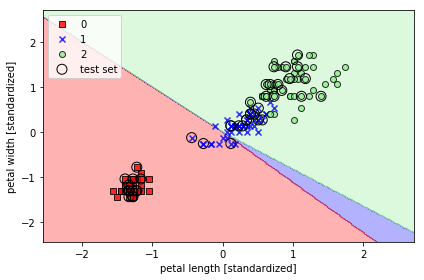

C =  0.1


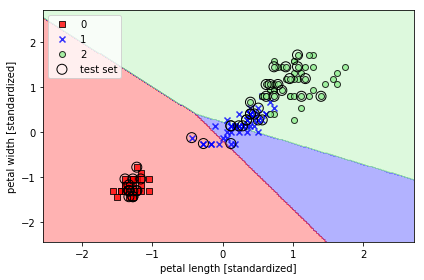

C =  1


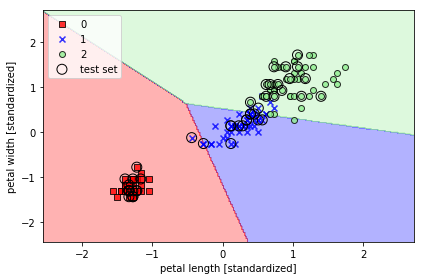

C =  10


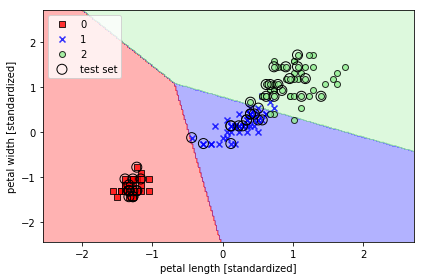

C =  100


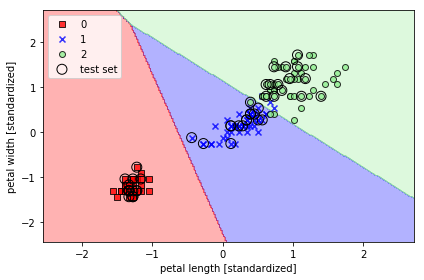

C =  1000


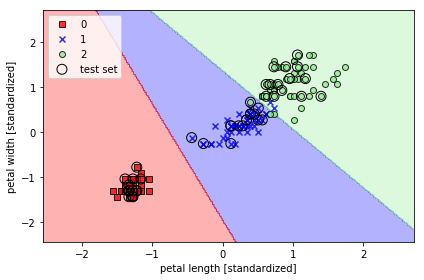

C =  10000


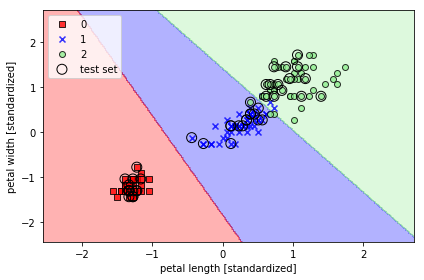

In [27]:
for c in [0.001,0.1,1,10,100,1000,10000]:
    print ('C = ', c)
    lr = LogisticRegression(C=c, random_state=1)
    lr.fit(X_train_std, y_train)    
    #Combine Train and Test for plotting
    X_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))
    plot_decision_regions(X_combined_std, y_combined,
                          classifier=lr, test_idx=range(105, 150))
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

## Support Vector Machine

- SVM tries to maximize the margin of decision boundary (a hyperpplane) with the closest point
- The point closest to the separating hyperplane is called Support Vectors
- The inverse regularization parameter C is used to adjust the width of margin of Hyperplane

C: 0.001


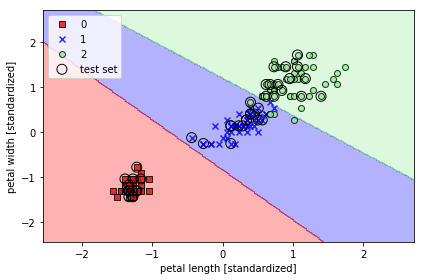

C: 0.01


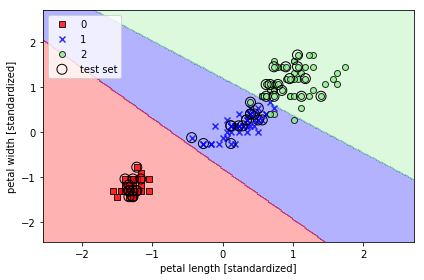

C: 1


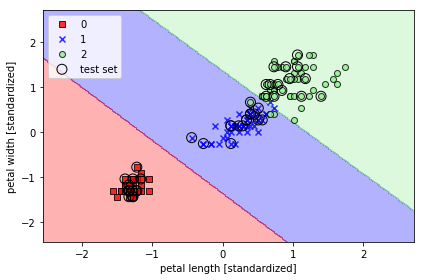

C: 10


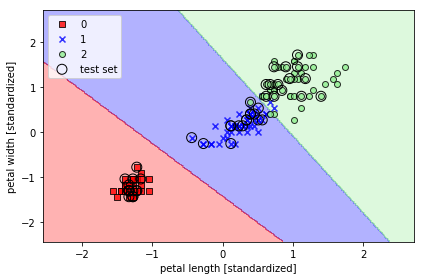

C: 100


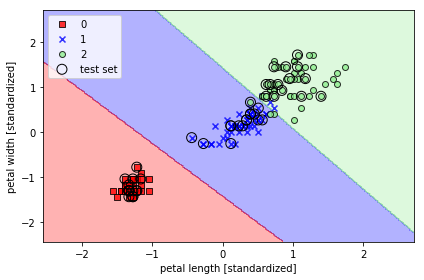

C: 1000


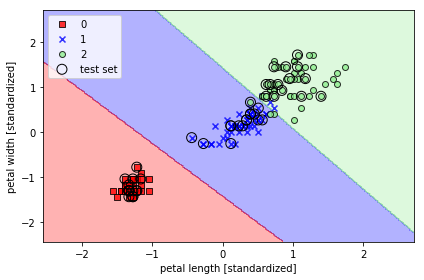

C: 10000


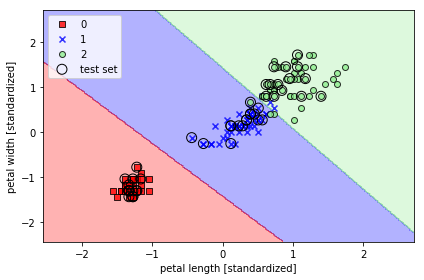

In [31]:
from sklearn.svm import SVC
for c in [0.001,0.01,1,10,100,1000,10000]:
    print('C:',c)
    svm = SVC(C=c,kernel='linear',random_state=1)
    svm.fit(X_train_std, y_train)
    plot_decision_regions(X_combined_std, 
                          y_combined,
                          classifier=svm, 
                          test_idx=range(105, 150))
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

## SGD Classifier
- The tradional Logistic Regression, Perceptron and SVM doesnt work well with huge amount of data. These models need to load data to computer's memory.
- For large data there is an alternate implementation using SGD Classifier (Stochastic Gradient Descent)
- This model has a partial fit capabality where we can do a fit on partial data. This is useful for training streaming data.

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='perceptron', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)


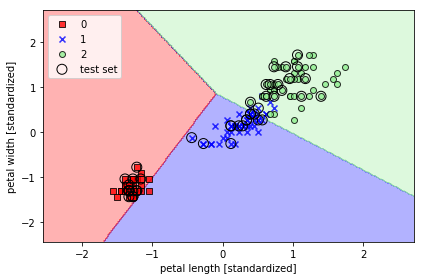

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)


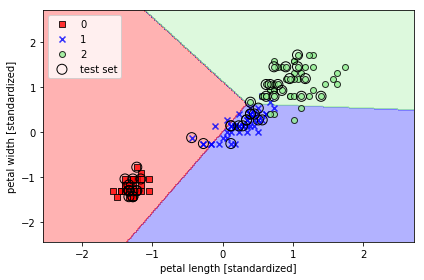

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)


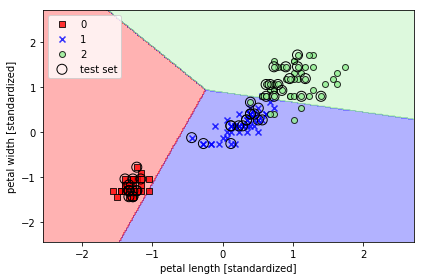

In [36]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier (loss='log')
svm = SGDClassifier (loss='hinge')
for model in [ppn,lr,svm]:
    print(model)
    model.fit(X_train_std, y_train)
    plot_decision_regions(X_combined_std, 
                          y_combined,
                          classifier=model, 
                          test_idx=range(105, 150))
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

## Kernel SVM
- This is used in situation where the data is not linearly seperable.
- Solution is to create non linear combination of features to project the data to a higher dimensional space where it becomes linearly seperable.
- This is acheived using kernel functions.
- Very commonly used kernel is Radial Basis Function (RBF) or Gaussian Kernel
- Gamma, the cut-off parameter of the guassian sphere, is the parameter to optimize here
- Higher the value of Gamma more tighter will be the decision boundary and causes overfit

Gamma 0.001


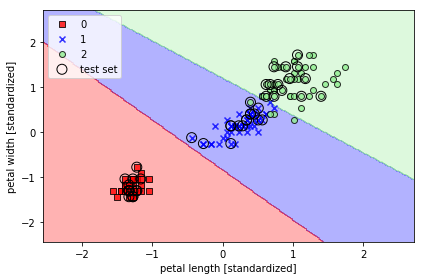

Gamma 0.01


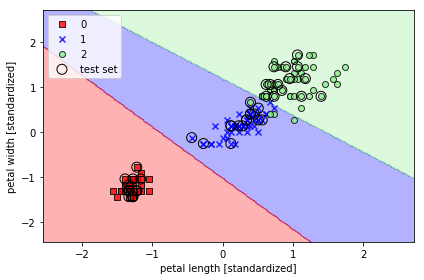

Gamma 1


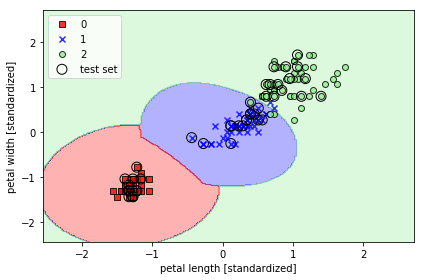

Gamma 10


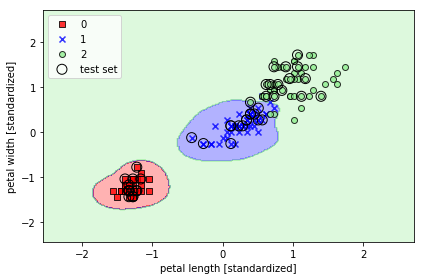

Gamma 100


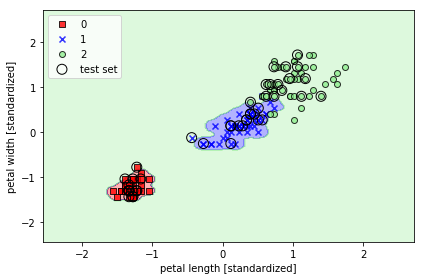

In [38]:
from sklearn.svm import SVC
for gamma in [0.001,0.01,1,10,100]:
    print('Gamma',gamma)
    svm = SVC(C=1.0,gamma=gamma,kernel='rbf',random_state=1)
    svm.fit(X_train_std, y_train)
    plot_decision_regions(X_combined_std, 
                          y_combined,
                          classifier=svm, 
                          test_idx=range(105, 150))
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

## Decision Trees

- This algorithm breaks down the data into branches based on certain conditions
- The split of data will done such a way that the Information Gain is maximum at each split
- Information Gain is the difference between the Impurity at parent node and sum of Impurity of each child node
- Lesser the impurity at child higher the Information Gain
- Entropy & Gini are the common impurity measures
- Entropy of a node is the proportion of samples that belongs to a class at that node. Entropy is 0 if all the samples belong to same class. Entropy is maximum if a the samples are uniformly distributed.
- Gini impurity is the probability of misclassification
- Both Gini & Entropy yeilds similar results
- To avoid over fitting we prune the tree at certain depth

Depth: 2


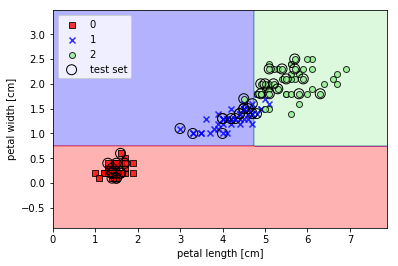

Depth: 3


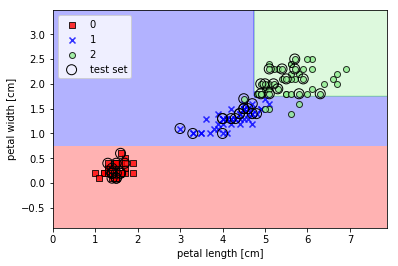

Depth: 4


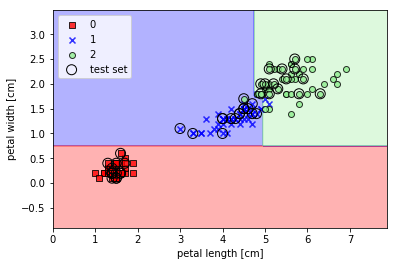

Depth: 5


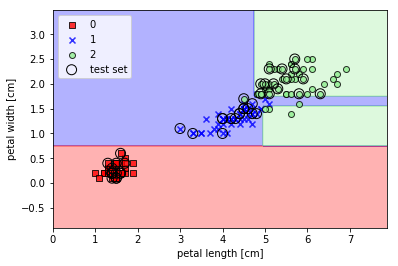

Depth: 6


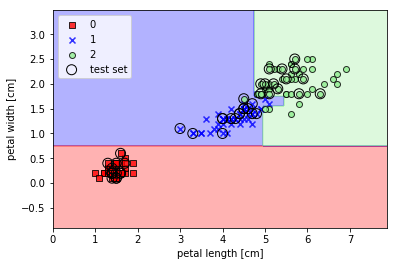

Depth: None


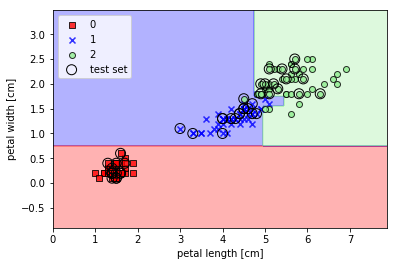

In [5]:
from sklearn.tree import DecisionTreeClassifier
for depth in [2,3,4,5,6,None]:
    print('Depth:',depth)
    tree = DecisionTreeClassifier(criterion='gini',max_depth=depth,random_state=1)
    tree.fit(X_train, y_train)
    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))
    plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))
    plt.xlabel('petal length [cm]')
    plt.ylabel('petal width [cm]')
    plt.legend(loc='upper left')
    plt.show()

In [7]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree,filled=True, rounded=True,class_names=['Setosa', 'Versicolor','Virginica'],
                           feature_names=['petal length', 'petal width'],out_file='Tree.png') 
#graph = graph_from_dot_data(dot_data) 
#graph.write_png('tree.png')